In [7]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import os
from matplotlib import pyplot as plt 

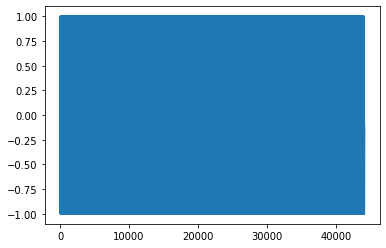

In [2]:
#from scipy.io import wavfile
#fs_wav, data_wav = wavfile.read("./data/filename.wav")
blockSize=1024
hopSize=512
fs=44100


f1=441
f2=882
t=1
samples1=np.arange(t * 44100)
samples2=np.arange(t * 44100)
sig_a=np.sin(2*np.pi*f1*samples1/fs)
sig_b=np.sin(2*np.pi*f2*samples2/fs)
sig=np.append(sig_a,sig_b)
samples=np.append(samples1,samples2)

#plt.title("Matplotlib demo") 
#plt.xlabel("x axis caption") 
#plt.ylabel("y axis caption") 
plt.plot(samples,sig)
plt.show()

In [9]:
def block_audio(x,blockSize,hopSize,fs):
    # Implement a function block_audio(x,blockSize,hopSize,fs) which returns
    # a matrix xb (dimension NumOfBlocks X blockSize) and a vector timeInSec (dimension NumOfBlocks) 
    # for blocking the input audio signal into overlapping blocks. timeInSec will refer to the start time of each block. 
    # Do not use any helper functions such as stride.
    #print("block function")
    #Returns a matrix [numBlocks * blockSize] and starttimeinsecs [numBlocks]
    a=1
    file_length=x.shape[0]
    numBlocks=np.ceil(file_length/hopSize).astype(int)
    #numBlocks = np.floor((file_length-blockSize)/hopSize + 1).astype(int) # throws error if not cast as int (PUT MORE DETAILED COMMENTS)
    numZeroes= hopSize-(file_length%hopSize)# file_length-[(hopSize*numBlocks) ]
    x=np.append(x,np.zeros(numZeroes))
    i=0
    lst=[]
    ts=[]
    for blk in range(0,numBlocks):
        if i == 0:
            start = 0
            i=i+1
        end = start + blockSize
        lst.append(x[start:end])
        #print(start)
        ts.append(start/fs)
        start = start + hopSize
        #end = end + hopSize
        out = np.array(lst)
        time = np.array(ts)
    return(out,time)


In [5]:
sr,x = scipy.io.wavfile.read('./trainData/01-D_AMairena.wav')

a,t = block_audio(x,1025,512,44100)


<ipython-input-5-13ac84fe751c>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('./trainData/01-D_AMairena.wav')
<ipython-input-4-a269f1be7204>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  out = np.array(lst)


(512,)

In [10]:
def comp_acf(inputVector, bIsNormalized=False):
    # Implement a function comp_acf(inputVector, bIsNormalized) 
    # which computes the autocorrelation function and returns the non-redundant (right) part of the result r. 
    # Normalization is controlled by parameter bIsNormalized. 
    # Do not use any helper functions such as xcorr.
    #print("comp_acf")
    c=[]
    #plt.figure()
    # print(inputVector)
    for block in inputVector:
        #print(block)
        z=np.zeros(block.shape[0])
        x=np.append(block,z)
        start=0
        #print(block)
        correl=[]

        for i in range(0,block.shape[0]):# Offset start of x by i samples
            start = i
            end = start + block.shape[0]
            #print(f"{start},{end}")
            #print(f"start - {start} end - {end}")
            y=x[start:end] #x[start:end]
            #print(y)
            corr = np.dot(y,block)
            if bIsNormalized:
                corr=corr/np.sqrt(np.dot(block,block) * np.dot(y,y))
                #value = value/np.sqrt(np.matmul(frame, frame)*np.matmul(inputVector, inputVector))
            #print(corr)
            correl.append(corr) # ADD THE SHIFTED DOT PRODUCT TO THE CORRELATION ARRAY FOR EACH BLOCK
        #print(len(correl)
            #plt.plot(np.array(correl))
        c.append(np.array(correl)) # ADD TO LIST WHEN THE BLOCK HAS BEEN FULLY COMPUTED 

    return np.array(c) # OUTPUT NEEDS TO BE AN ARRAY OF CORRELATION ARRAYS
        

In [5]:
"""def get_f0_from_acf (r, fs):
    # Implement a function get_f0_from_acf (r, fs) that takes the output of comp_acf 
    # and computes and returns the fundamental frequency f0 of that block in Hz 
    # (Textbook ref: 7.3.3.2).
    f=[]
    p,_=scipy.signal.find_peaks(r) 
    #print(p[0])
    calculated_ts=p[0] # THIS METHOD WILL BREAK FOR REAL WORLD SIGNALS
    # To fix this for real world signals, iterate through p, and find the value of r at each of these sample numbers.
    # The max of this value will correspond to the sample number for the fundamental frequency
    f_calc=fs/calculated_ts
    f.append(f_calc)
    plt.plot(r)
    plt.plot(p,r[p],"x")
    return np.array(f)"""

'def get_f0_from_acf (r, fs):\n    # Implement a function get_f0_from_acf (r, fs) that takes the output of comp_acf \n    # and computes and returns the fundamental frequency f0 of that block in Hz \n    # (Textbook ref: 7.3.3.2).\n    f=[]\n    p,_=scipy.signal.find_peaks(r) \n    #print(p[0])\n    calculated_ts=p[0] # THIS METHOD WILL BREAK FOR REAL WORLD SIGNALS\n    # To fix this for real world signals, iterate through p, and find the value of r at each of these sample numbers.\n    # The max of this value will correspond to the sample number for the fundamental frequency\n    f_calc=fs/calculated_ts\n    f.append(f_calc)\n    plt.plot(r)\n    plt.plot(p,r[p],"x")\n    return np.array(f)'

In [11]:
def get_f0_from_acf (r, fs):
    # Implement a function get_f0_from_acf (r, fs) that takes the output of comp_acf 
    # and computes and returns the fundamental frequency f0 of that block in Hz 
    # (Textbook ref: 7.3.3.2).
    #print("get_f0")
    f=[]
    p,_=scipy.signal.find_peaks(r) 
    #print(p[0])
    calculated_ts = p[np.argmax(r[p])]
    #calculated_ts=p[0] # THIS METHOD WILL BREAK FOR REAL WORLD SIGNALS
    # To fix this for real world signals, iterate through p, and find the value of r at each of these sample numbers.
    # The max of this value will correspond to the sample number for the fundamental frequency
    #if calculated_ts == 0:
    #   print(r)
    #   print(p)
    #   for ele in p:
    #      print(r[ele],ele)
    #print(calculated_ts)
    f_calc=fs/calculated_ts
    f.append(f_calc)
    #plt.plot(r)
    #plt.plot(p,r[p],"x")
    return np.array(f)

In [8]:
blockSize=1024
hopSize=512
fs=44100


f1=441
f2=882
t=1
samples1=np.arange(t * 44100)
samples2=np.arange(t * 44100)
sig_a=np.sin(2*np.pi*f1*samples1/fs)
sig_b=np.sin(2*np.pi*f2*samples2/fs)
sig=np.append(sig_a,sig_b)
samples=np.append(samples1,samples2)

blocks,times=block_audio(sig,blockSize, hopSize, fs)
calculated_correlation=comp_acf(blocks)
print (calculated_correlation[0].shape)

<ipython-input-3-a269f1be7204>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  out = np.array(lst)


(1024,)


<ipython-input-4-3de70d717c47>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(c) # OUTPUT NEEDS TO BE AN ARRAY OF CORRELATION ARRAYS


In [9]:
p,_=scipy.signal.find_peaks(calculated_correlation[0])
print(p)
print(np.argmax(max(calculated_correlation[0][p])))
print(p[np.argmax(calculated_correlation[0][p])])

[100 200 300 400 500 599 699 799 898 992]
0
100


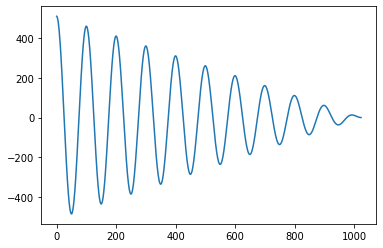

In [218]:
r_test = calculated_correlation[0]
plt.plot(r_test)

In [220]:
p_test,_=scipy.signal.find_peaks(r_test)
print (p_test) 

[100 200 300 400 500 599 699 799 898 992]


In [224]:
p_test[np.argmax(r_test[p_test])]

100

In [12]:
def track_pitch_acf(x,blockSize,hopSize,fs):
    # Implement a 'main' function track_pitch_acf(x,blockSize,hopSize,fs) 
    # that calls the three functions above and returns two vectors f0 and timeInSec.
    #print("track_pitch")
    a,ts = block_audio(x,blockSize,hopSize,fs)
    #print(a.shape)
    #print(ts.shape)
    f=[]
    c = comp_acf(a)
    #f_calc = get_f0_from_acf(c,fs)

    for blk in range(0,c.shape[0]):
        #print(blk)
        f_calc = get_f0_from_acf(c[blk],fs)
        f.append(f_calc)
        #print(f_calc)
    f0=np.array(f)
    #print(f0.shape)
    return f0,ts

In [1]:
2**(74-69)

32

In [13]:
def convert_freq2midi(freqInHz):
    # Implement a function convert_freq2midi(freqInHz) that returns a variable pitchInMIDI of the same dimension as freqInHz. 
    # Note that the dimension of freqInHz can be a scalar, a vector, or a matrix. 
    # The conversion is described in Textbook Section: 7.2.3. Assume f(A4) = 440Hz.
    fA4=440
    midi_freq=[]
    for f in freqInHz:
        if f == 0:
            midi_freq.append(0)
        else:
            m = 69 + 12*np.log2(f/fA4)
            midi_freq.append(m)
    return np.array(midi_freq)

In [14]:
def eval_pitchtrack(estimateInHz, groundtruthInHz):
    # Implement a function eval_pitchtrack(estimateInHz, groundtruthInHz) that computes the 
    # RMS of the error in Cent (Textbook Section: 7.2.3)
    # in the pitch domain (not frequency) and returns this as errCentRms. 
    # Note: exclude blocks with annotation = 0

    # TODO - NEED TO HANDLE THE CASE WHERE GROUND TRUTH IS 0 
    est_pitch = convert_freq2midi(estimateInHz)
    ground_pitch = convert_freq2midi(groundtruthInHz)
    error_cents = [] 

    for i in range(0,est_pitch.shape[0]):
        if ground_pitch[i] != 0:
            error_cents.append(100 * (ground_pitch[i] - est_pitch[i]))
        else:
            error_cents.append(0)
    l = len(error_cents)
    # TRY TO VECTORIZE RMS CALCULATION 
    square_sum=0
    for error in error_cents:
        #print(error)
        square_sum = square_sum + (error**2)
    return np.sqrt(square_sum/l)

# Ground truth load

In [10]:
lut = np.loadtxt('./trainData/01-D_AMairena.f0.Corrected.txt')
#NEED TPO REMOVE FIRST 2 ELEMENTS
onset_seconds = lut[:,1]
duration_seconds = lut[:,1]
pitch_frequency = lut[:,2]
quantized_frequency = lut[:,3]

## The above results indicate that the first two blocks of the ground truth must be discarded to align with the calculated output
## Try printing the timestamps and see how the annotated and the calculated timestamps change

# Audio File Load

In [256]:
sr,x = scipy.io.wavfile.read('./trainData/01-D_AMairena.wav')

44100
[-146 -143 -137 ...    2    1    0]


<ipython-input-256-792547fb4558>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('./trainData/01-D_AMairena.wav')


In [268]:
np.ceil(x.shape[0]/duration_seconds.shape[0]).astype(int)

512.0

In [29]:
lut = np.loadtxt('./trainData/01-D_AMairena.f0.Corrected.txt')
#NEED TPO REMOVE FIRST 2 ELEMENTS
onset_seconds = lut[:,1]
duration_seconds = lut[:,1]
pitch_frequency = lut[:,2]
quantized_frequency = lut[:,3]

sr,x = scipy.io.wavfile.read('./trainData/01-D_AMairena.wav')

hopSize = np.ceil(x.shape[0]/duration_seconds.shape[0]).astype(int)
blockSize = 2 * hopSize



f0,ts = track_pitch_acf(x,blockSize,hopSize,sr)

est_pitch = convert_freq2midi(f0)
ground_pitch = convert_freq2midi(pitch_frequency)

eval_pitchtrack(f0,pitch_frequency)

<ipython-input-29-576373142414>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('./trainData/01-D_AMairena.wav')
<ipython-input-3-a269f1be7204>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  out = np.array(lst)
<ipython-input-4-3de70d717c47>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(c) # OUTPUT NEEDS TO BE AN ARRAY OF CORRELATION ARRAYS


array([17.50344441])

In [1]:
%matplotlib
plt.plot(f0[1000:1500])
plt.plot(pitch_frequency[1000:1500])
plt.xlabel('Block Number')
plt.ylabel('Frequency (Hz)')
plt.legend(['Estimated Frequency','Ground Truth'])
plt.title('Estimated Frequency vs Ground Truth (zoomed sample)')

Using matplotlib backend: MacOSX


NameError: name 'plt' is not defined

In [30]:
import pandas as pd
df=pd.DataFrame()

lut = np.loadtxt('./trainData/01-D_AMairena.f0.Corrected.txt')
#NEED TPO REMOVE FIRST 2 ELEMENTS
onset_seconds = lut[:,1]
duration_seconds = lut[:,1]
pitch_frequency = lut[:,2]
quantized_frequency = lut[:,3]

df['pitch_freq']=pitch_frequency
df['f0'] = f0
df['est_pitch'] = est_pitch
df['ground_pitch'] = ground_pitch

In [31]:
#df['cents_diff']=df['ground_pitch']-df['est_pitch']
df.loc[df['ground_pitch'] == 0, 'cents_diff'] = 0
df.loc[df['ground_pitch'] != 0, 'cents_diff'] = 100*(df['ground_pitch']-df['est_pitch'])
df['sq_error']=df['cents_diff']**2
df

,pitch_freq,f0,est_pitch,ground_pitch,cents_diff,sq_error
0,0.000,14700.000000,74.062169,0.000000,0.000000,0.000000
1,0.000,14700.000000,74.062169,0.000000,0.000000,0.000000
2,0.000,14700.000000,74.062169,0.000000,0.000000,0.000000
3,0.000,14700.000000,74.062169,0.000000,0.000000,0.000000
4,0.000,14700.000000,74.062169,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
2219,317.206,317.266187,68.528190,68.527917,-0.027371,0.000749
2220,317.427,317.266187,68.528190,68.528921,0.073107,0.005345
2221,317.749,317.266187,68.528190,68.530384,0.219381,0.048128
2222,319.023,317.266187,68.528190,68.536157,0.796667,0.634678


In [36]:
print(df['cents_diff'].max())
print(df['cents_diff'].min())

print(df['sq_error'].max())
print(df['sq_error'].min())

print((df['sq_error'].sum()/len(df))**0.5)

137.57986039924646
-354.17671458979925
125441.14515762411
0.0
17.503444408038845


In [353]:
np.sqrt(df['sq_error'].mean())

17.503444408038835

In [339]:
for i in range(0,ground_pitch.shape[0]):
    #print(pitch_frequency[i],f0[i])
    print(est_pitch[0],ground_pitch[0])

[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.06216882] 0.0
[74.062168

## Directory Parseing

In [15]:
def run_evaluation (complete_path_to_data_folder):
    errorcents={}
    files=0
    errCentRms = 0
    for file_name in os.listdir(complete_path_to_data_folder):
        if file_name.endswith(".wav"):
            files = files+1
            name=file_name[:-4]
            print(name)
            #print(loc+name+'.wav')
            #print(loc+name+'.f0.Corrected.txt')
            sr,x = scipy.io.wavfile.read(complete_path_to_data_folder+name+'.wav')

            lut = np.loadtxt(complete_path_to_data_folder+name+'.f0.Corrected.txt')
            onset_seconds = lut[:,1]
            duration_seconds = lut[:,1]
            pitch_frequency = lut[:,2]
            quantized_frequency = lut[:,3]

            hopSize = np.ceil(x.shape[0]/duration_seconds.shape[0]).astype(int)
            blockSize = 2 * hopSize

            f0,ts = track_pitch_acf(x,blockSize,hopSize,sr)
            err = eval_pitchtrack(f0,pitch_frequency)
            
            errorcents[name] = err
            errCentRms = errCentRms + (err ** 2)
    errCentRms = np.sqrt(errCentRms/files)
    return errCentRms


In [16]:
run_evaluation(loc)

01-D_AMairena


<ipython-input-15-1a0242d0c732>:12: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read(complete_path_to_data_folder+name+'.wav')
<ipython-input-9-a269f1be7204>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  out = np.array(lst)
<ipython-input-10-3de70d717c47>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(c) # OUTPUT NEEDS TO BE AN ARRAY OF CORRELATION ARRAYS


24-M1_AMairena-Martinete
63-M2_AMairena


array([350.12742587])

In [5]:
import numpy as np
import scipy
import scipy.io
import scipy.signal
import os
loc='./trainData/'


In [ ]:
midi=convert_freq2midi(f0)
print(midi[0:5])
print(midi[-5:])

[[69.00327513]
 [69.00327513]
 [69.00327513]
 [69.00327513]
 [69.00327513]]
[[70.00327513]
 [70.00327513]
 [70.00327513]
 [70.00327513]
 [70.03242148]]


In [330]:
print(errorcents)
print(errCentRms[0])

{'01-D_AMairena': array([17.50344441]), '24-M1_AMairena-Martinete': array([36.41084279]), '63-M2_AMairena': array([30.3615205])}
29.17728548881216


# TESTING

In [242]:
sr,x = scipy.io.wavfile.read('./trainData/01-D_AMairena.wav')


blockSize=1024
hopSize=512
fs=sr

f0,t=track_pitch_acf(x,blockSize, hopSize, fs)


<ipython-input-242-d99d8a7fc22f>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read('./trainData/01-D_AMairena.wav')


track_pitch
block function
comp_acf
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
32
33
33
297
266
250
56
62
55
154
138
126
121
117
114
112
112
112
113
115
116
116
117
116
116
115
113
112
111
111
111
112
113
115
116
118
119
120
119
117
114
111
108
107
106
105
105
106
106
106
107
108
108
107
107
106
106
105
105
105
106
106
107
108
108
108
108
108
108
108
107
106
106
106
107
107
108
108
109
109
110
110
110
109
108
107
107
107
107
107
107
107
107
108
108
108
108
108
107
106
106
106
106
106
107
107
107
107
107
107
107
108
108
108
108
108
107
107
107
107
107
111
114
133
134
12
177
209
231
108
108
322
109
215
215
108
108
109
107
108
109
107
109
108
108
108
108
108
35
108
108
29
24
108
108
31
58
55
110
29
31
108
107
107
37
53
53
32
107
214
199
187
163
23
139
127
122
118
115
113
112
112
113
114
115
115
115
115
115
114
113
111
110
110
111
111
113
115
117
118
118
116
114
111
108
106
105
104
105
106
106
107
108
109
109
108
107
106
106
106
106
106
106
107
107
107
108
109
111
112
113
112
112
112
112
112
113
11

array([[14700.        ],
       [14700.        ],
       [14700.        ],
       ...,
       [  317.26618705],
       [  317.26618705],
       [  317.26618705]])

In [19]:
# TODO: Add
sig_a=np.sin(2*np.pi*f1*samples1/fs)
sig_b=np.sin(2*np.pi*f2*samples2/fs)
s=sig_a+sig_b
blockSize=1024
hopSize=512
fs=44100

f0,t=track_pitch_acf(s,blockSize, hopSize, fs)
#f0

<ipython-input-3-a269f1be7204>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  out = np.array(lst)
<ipython-input-4-3de70d717c47>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(c) # OUTPUT NEEDS TO BE AN ARRAY OF CORRELATION ARRAYS


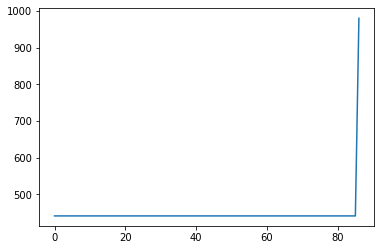

In [20]:
plt.plot(f0)

In [25]:
file_length=101
blockSize=10
hopSize=5
print(np.floor((file_length-blockSize)/hopSize + 1).astype(int))
print(np.ceil(file_length/hopSize))

19
21.0


# Testing for a signal of ones

In [175]:
inp = np.vstack((np.ones(1024),np.ones(1024)))

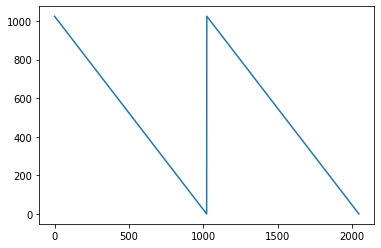

In [203]:
my_correlation=comp_acf(inp)
plt.plot(my_correlation)

# Testing for the test signal given:
## --> sine wave of frequency 441 Hz for 1s followed by a frequency of 882 Hz for 1s 

In [19]:
blockSize=1024
hopSize=512
fs=44100


f1=441
f2=882
t=1
samples1=np.arange(t * 44100)
samples2=np.arange(t * 44100)
sig_a=np.sin(2*np.pi*f1*samples1/fs)
sig_b=np.sin(2*np.pi*f2*samples2/fs)
sig=np.append(sig_a,sig_b)
samples=np.append(samples1,samples2)

blocks,times=block_audio(sig,blockSize, hopSize, fs)
calculated_correlation=comp_acf(blocks)

<ipython-input-8-a269f1be7204>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  out = np.array(lst)
<ipython-input-9-3de70d717c47>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(c) # OUTPUT NEEDS TO BE AN ARRAY OF CORRELATION ARRAYS


# Testing scipy correlation function on each block

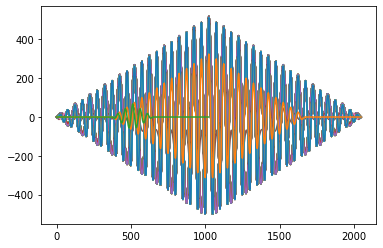

In [51]:
import scipy.signal
plt.figure()
for block in a:
    testCorr = scipy.signal.correlate(block,block)
    plt.plot(testCorr)

# Plot the calculated fundamental frequencies

<ipython-input-3-a269f1be7204>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  out = np.array(lst)
<ipython-input-4-3de70d717c47>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(c) # OUTPUT NEEDS TO BE AN ARRAY OF CORRELATION ARRAYS


Text(0.5, 1.0, 'Estimated Frequency for the sinusoidal signal')

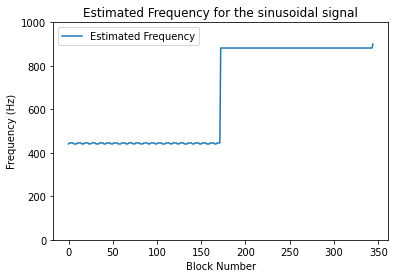

In [37]:
blockSize=512 # AT BLOCK SIZE BELOW 256 AND HOP SIZE BELOW 128 IT BREAKS
hopSize=256
fs=44100 # AT Fs OF 88200 IT BREAKS


f1=441
f2=882
t=1
samples1=np.arange(t * fs)
samples2=np.arange(t * fs)
sig_a=np.sin(2*np.pi*f1*samples1/fs)
sig_b=np.sin(2*np.pi*f2*samples2/fs)
sig=np.append(sig_a,sig_b)
samples=np.append(samples1,samples2)
f0,ts=track_pitch_acf(sig,blockSize,hopSize, fs)

plt.plot(f0)
plt.xlabel('Block Number')
plt.ylabel('Frequency (Hz)')
plt.legend(['Estimated Frequency'])
plt.ylim(0,1000)
plt.title('Estimated Frequency for the sinusoidal signal')

In [38]:
f0[0:20]

array([[441.        ],
       [445.45454545],
       [445.45454545],
       [445.45454545],
       [445.45454545],
       [445.45454545],
       [441.        ],
       [441.        ],
       [441.        ],
       [441.        ],
       [445.45454545],
       [445.45454545],
       [445.45454545],
       [445.45454545],
       [445.45454545],
       [441.        ],
       [441.        ],
       [441.        ],
       [445.45454545],
       [445.45454545]])

In [106]:
sig_a=np.sin(2*np.pi*f1*samples1/fs)
sig_b=np.sin(2*np.pi*f2*samples2/fs)
s=sig_a+sig_b
s

array([ 0.        ,  0.18812375,  0.37402312, ..., -0.55550587,
       -0.37402312, -0.18812375])

# Testing scipy.signal.find_peaks

In [60]:
peaks,_=scipy.signal.find_peaks(calculated_correlation[0])
peaks

array([100, 200, 300, 400, 500, 599, 699, 799, 898, 992])

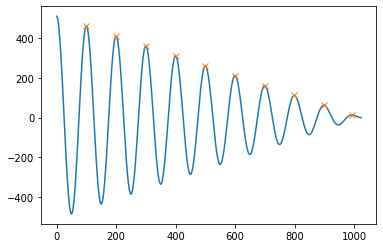

In [88]:
plt.plot(calculated_correlation[0])
plt.plot(peaks,calculated_correlation[0][peaks],"x") # plot(x_position, y_position,marker)

# TEST WHAT HAPPENS FOR A COMPLEX REAL WORLD SIGNAL WITH MULTIPLE SINUSOIDS (TODO)

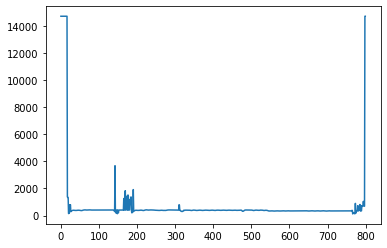

In [239]:
plt.plot(f0[:800])

In [240]:
f0[800]

array([14700.])

In [237]:
f0[np.argmax(f0[100:])]

array([336.64122137])

# Testing eval_pitchtrack

In [144]:
estimateInHz=np.array([441,441,441,441])
groundtruthInHz = np.array([441,441,441,441])
eval_pitchtrack(estimateInHz,groundtruthInHz)

0.0

In [42]:
def create_test_signal(fs):

    f1=441
    f2=882
    t=1
    samples1=np.arange(t * 44100)
    samples2=np.arange(t * 44100)
    sig_a=np.sin(2*np.pi*f1*samples1/fs)
    sig_b=np.sin(2*np.pi*f2*samples2/fs)
    sig=np.append(sig_a,sig_b)
    return sig

x = create_test_signal(44100)
ground_truth = []
for i in range(0,x.shape[0]):
    if i%512 == 0:
        if i <= 44100:
            ground_truth.append(441)
        if i > 44100:
            ground_truth.append(882)

ground_truth=np.array(ground_truth)

In [43]:
ground_truth.shape[0] == 

173